In [1]:
import os
os.chdir('mmsegmentation')

In [ ]:
!pip install -v -e .

In [3]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 1.10.1+cu113
CUDA 是否可用 False


/home/shirley/open/miniconda3/envs/mmlab/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
# 检查 mmcv
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.3
编译器版本 GCC 9.3


In [5]:
# 检查 mmsegmentation
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


## Visualize Data

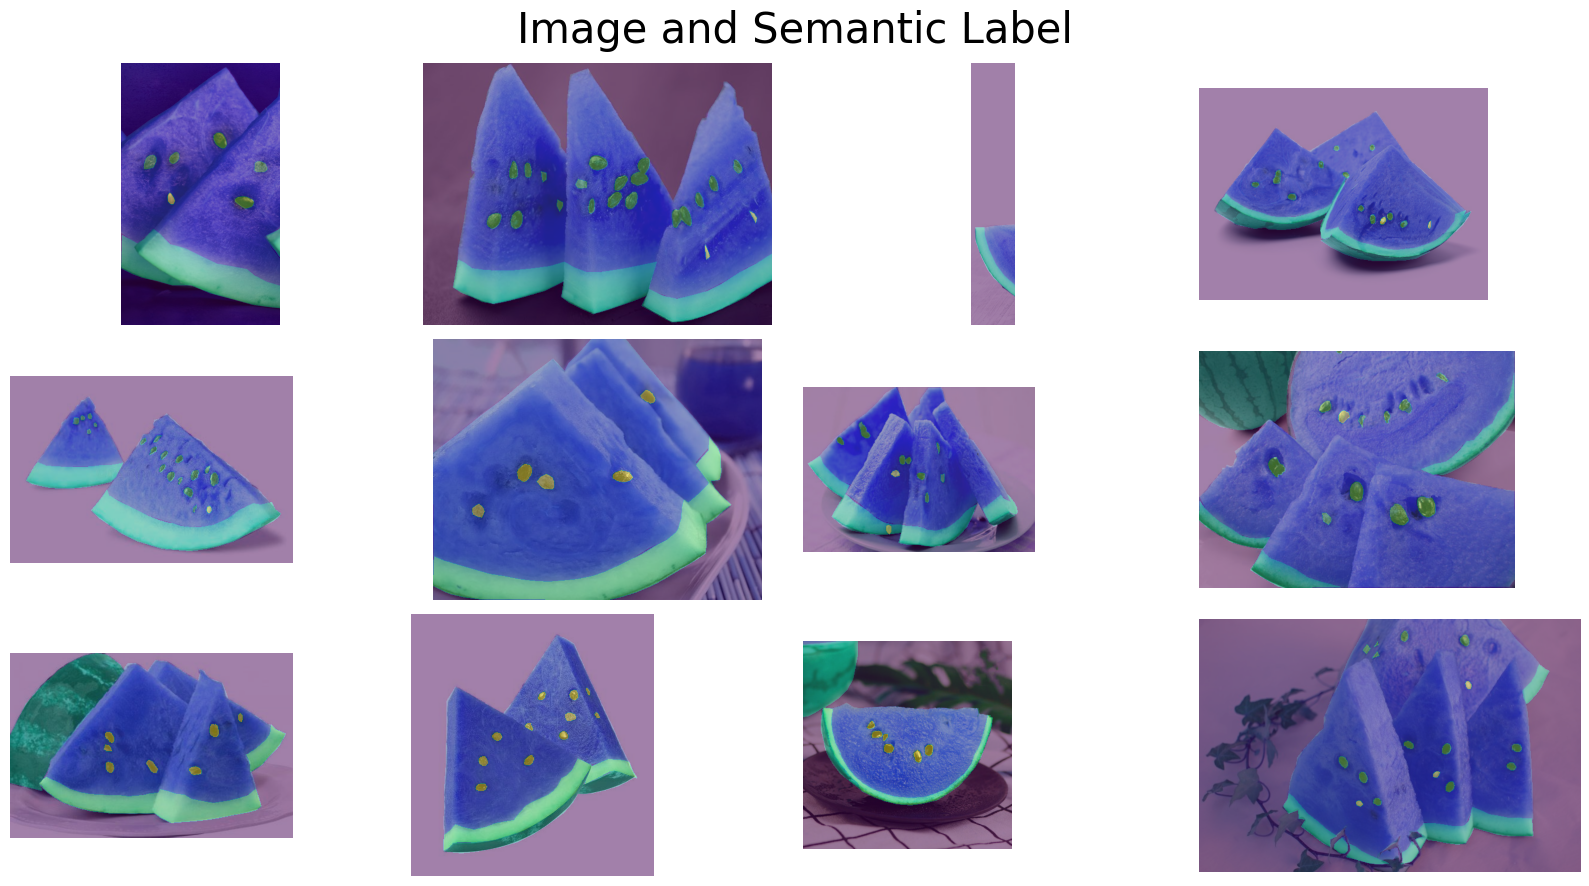

In [12]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/train'
PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train'

fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, figsize=(16,9))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:12]):
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    row = i // 4
    col = i % 4
    axes[row, col].imshow(img)
    axes[row, col].imshow(mask[:,:,0], alpha=0.5)
    axes[row, col].axis('off') 
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()


## set config

```
Watermelon87_Semantic_Seg_Mask/pspnet-watermelon.py
```


In [13]:
!python tools/train.py Watermelon87_Semantic_Seg_Mask/pspnet-watermelon.py

/home/shirley/open/miniconda3/envs/mmlab/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
06/19 19:08:17 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Mar  8 2023, 14:00:05) [GCC 11.2.0]
    CUDA available: False
    numpy_random_seed: 0
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f

## val

In [14]:
!python tools/test.py Watermelon87_Semantic_Seg_Mask/pspnet-watermelon.py work_dirs/pspnet-watermelon/best_aAcc_iter_400.pth

/home/shirley/open/miniconda3/envs/mmlab/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
06/19 20:05:05 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.9.16 (main, Mar  8 2023, 14:00:05) [GCC 11.2.0]
    CUDA available: False
    numpy_random_seed: 0
    GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
    PyTorch: 1.10.1+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.2.3 (Git Hash 7336ca9f

## test image and video

In [15]:
os.listdir('Watermelon87_Semantic_Seg_Mask/test_dir')

['w.mp4', '1.jpg']

In [16]:
!python demo/image_demo.py  \
        Watermelon87_Semantic_Seg_Mask/test_dir/1.jpg \
        Watermelon87_Semantic_Seg_Mask/pspnet-watermelon.py \
        work_dirs/pspnet-watermelon/best_aAcc_iter_400.pth \
        --out-file outputs/outputs.jpg \
        --device 'cpu' \
        --opacity 0.7

/home/shirley/open/miniconda3/envs/mmlab/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
/home/shirley/open/workspace/CV/mmlab/mmlab_hw/homework-4/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/shirley/open/workspace/CV/mmlab/mmlab_hw/homework-4/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_en

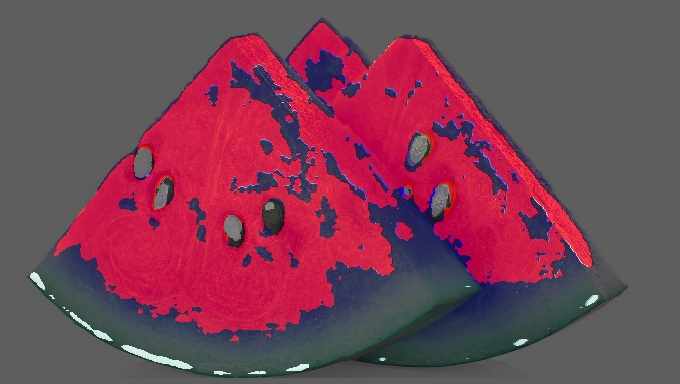

In [17]:
from PIL import Image
Image.open('outputs/outputs.jpg')

In [18]:
!python demo/video_demo.py  \
        Watermelon87_Semantic_Seg_Mask/test_dir/w.mp4 \
        Watermelon87_Semantic_Seg_Mask/pspnet-watermelon.py \
        work_dirs/pspnet-watermelon/best_aAcc_iter_400.pth \
        --output-file outputs/outputs.mp4 \
        --device 'cpu' \
        --opacity 0.7

/home/shirley/open/miniconda3/envs/mmlab/lib/python3.9/site-packages/torch/cuda/__init__.py:80: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0
/home/shirley/open/workspace/CV/mmlab/mmlab_hw/homework-4/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/shirley/open/workspace/CV/mmlab/mmlab_hw/homework-4/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_en